# Milan Bansal
# Roll no: 214102318

# $$ \color{red} { \text{ASSIGNMENT : 5} }$$

In [1]:
import numpy as np
import scipy as sp
from scipy import signal 
from matplotlib import pyplot as plt
import time

pi = np.pi

In [2]:
def dft(f): # function to calculate DFT
    N = len(f)
    W = np.zeros((N,N), dtype = complex) # zero complex array
    w = np.exp(-2j * pi / N)
    for i in range(N): # creating W matrix to calculate DFT
        for j in range(N):
            W[i][j] = w**(i * j)
    op = np.matmul(W,f)
        
        # returns k axis, real part, imag part, and modulus
    return  op, abs(op) 


def i_dft(Xw):
    N = len(Xw)
    W = np.zeros((N,N), dtype = complex) # zero complex array
    w = np.exp(-2j * pi / N)
    for i in range(N): # creating W matrix to calculate IDFT
        for j in range(N):
            W[i][j] = w**(i * j)
        
    return np.matmul(np.linalg.inv(W),Xw)

# Q1
#### Generate the following signal for 1 sec duration at sampling frequency of 200 Hz.
$$ x(t) = 9sin(2\pi f_{1}t) + 7sin(2\pi f_{2}t) + 5sin(2\pi f_{3}t) + 3sin(2\pi f_{4}t) $$
#### where $f_{1} = 5 Hz $, $f_{2} = 15 Hz $, $f_{3} = 25 Hz $ and $f_{4} = 50 Hz $
#### (a) Plot x(t).
#### (b) Determine the DFT of x(t) and plot its 1-sided magnitude spectrum (with frequency in Hz on x-axis).
#### (c) Generate a digital butterworth bandpass filter of order-6 (using scipy) with 10 Hz and 30 Hz as its lower and upper cutoff frequencies, respectively, and plot its magnitude spectrum.
#### (d) Multiply the frequency response of bandpass filter and DFT spectrum of x(t) to obtain the filtered spectrum and plot the same.
#### (e) Apply inverse DFT on the filtered spectrum to obtain the filtered signal and plot the same.

# a

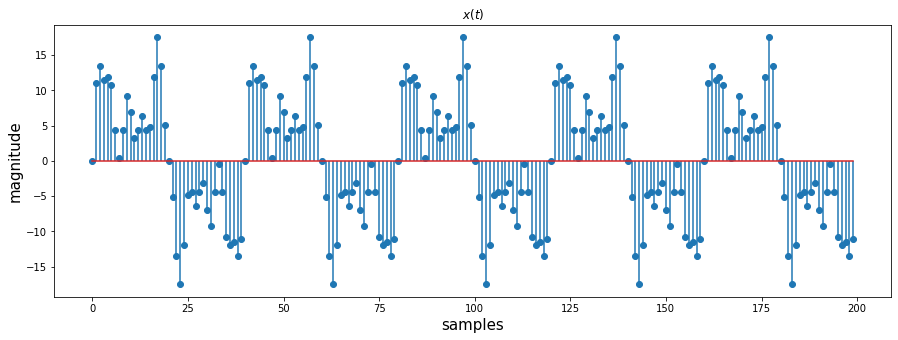

In [3]:
q1_t = np.arange(0,1,1/200)
# given frequnecies
q1_f1 = 5
q1_f2 = 15
q1_f3 = 25
q1_f4 = 50

# given signal
q1_x = 9 * np.sin(2*pi*q1_f1*q1_t) + 7 * np.sin(2*pi*q1_f2*q1_t) + 5 * np.sin(2*pi*q1_f3*q1_t) + 3 * np.sin(2*pi*q1_f4*q1_t)


#plotting
plt.figure(figsize = (15,5))
plt.stem(q1_x)
plt.title(r'$x(t)$')
plt.ylabel('magnitude', size =15)
plt.xlabel("samples", size = 15)
# plt.xticks(np.arange(200))
plt.show()

# b

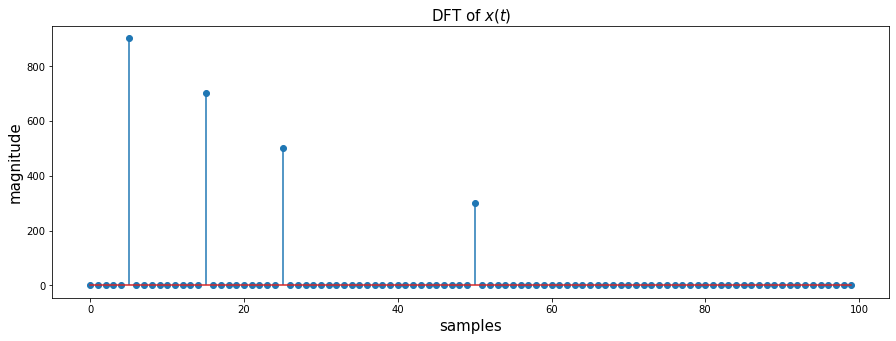

In [4]:
q1_dft, q1_mag = dft(q1_x) # calculating DFT
q1_mag[100:200] = 0 # one sided DFT
q1_dft[100:200] = 0
# plotting DFT
plt.figure(figsize = (15,5))
plt.stem(q1_mag[0:100])
plt.title(r'DFT of $x(t)$', size = 15)
plt.ylabel('magnitude', size =15)
plt.xlabel("samples", size = 15)
# plt.xticks(np.arange(200))
plt.show()

# c

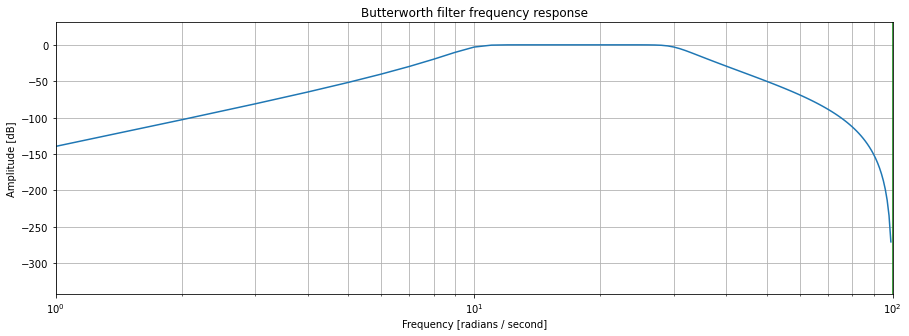

In [5]:
b, a = signal.butter(6,[10,30],btype='bandpass',output='ba',fs=200) # filter design

w, h = signal.freqz(b, a,fs=200,worN = 100) # transfer function

# plotting 
plt.figure(figsize = (15,5))
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

# d

<Figure size 1296x360 with 0 Axes>

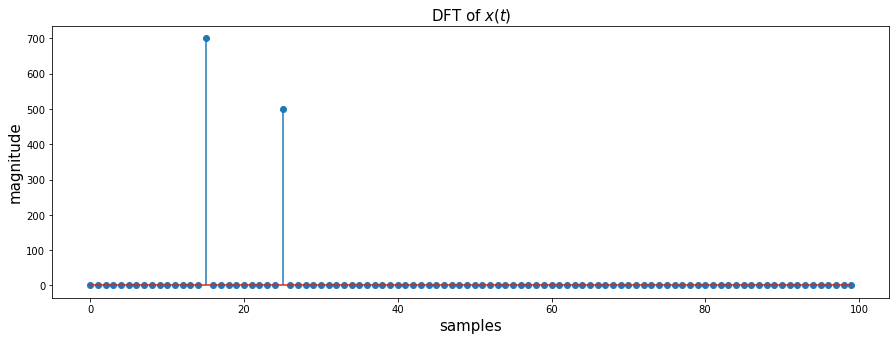

In [6]:
q1_op_dft = h * q1_dft[0:100] # multiplication of DFTs of filter and signal

# plotting the resultant
plt.figure(figsize = (18,5))
new = np.concatenate((q1_op_dft, q1_op_dft[::-1]))
plt.figure(figsize = (15,5))
plt.stem(abs(q1_op_dft))
plt.title(r'DFT of $x(t)$', size = 15)
plt.ylabel('magnitude', size =15)
plt.xlabel("samples", size = 15)
# plt.xticks(np.arange(200))
plt.show()

# e

C:\Users\Asus\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Asus\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


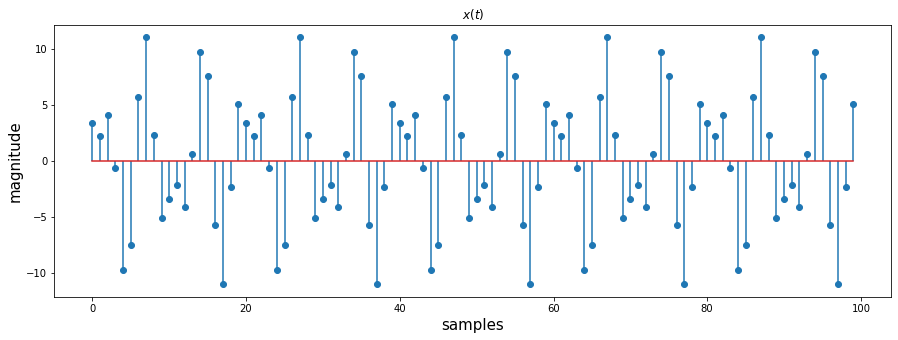

In [7]:
q1_op = np.fft.ifft(q1_op_dft) # taking inverse dft

# plotting the resulatant signal
plt.figure(figsize = (15,5))
plt.stem(q1_op)
plt.title(r'$x(t)$')
plt.ylabel('magnitude', size =15)
plt.xlabel("samples", size = 15)
# plt.xticks(np.arange(200))
plt.show()

# Q2
# a

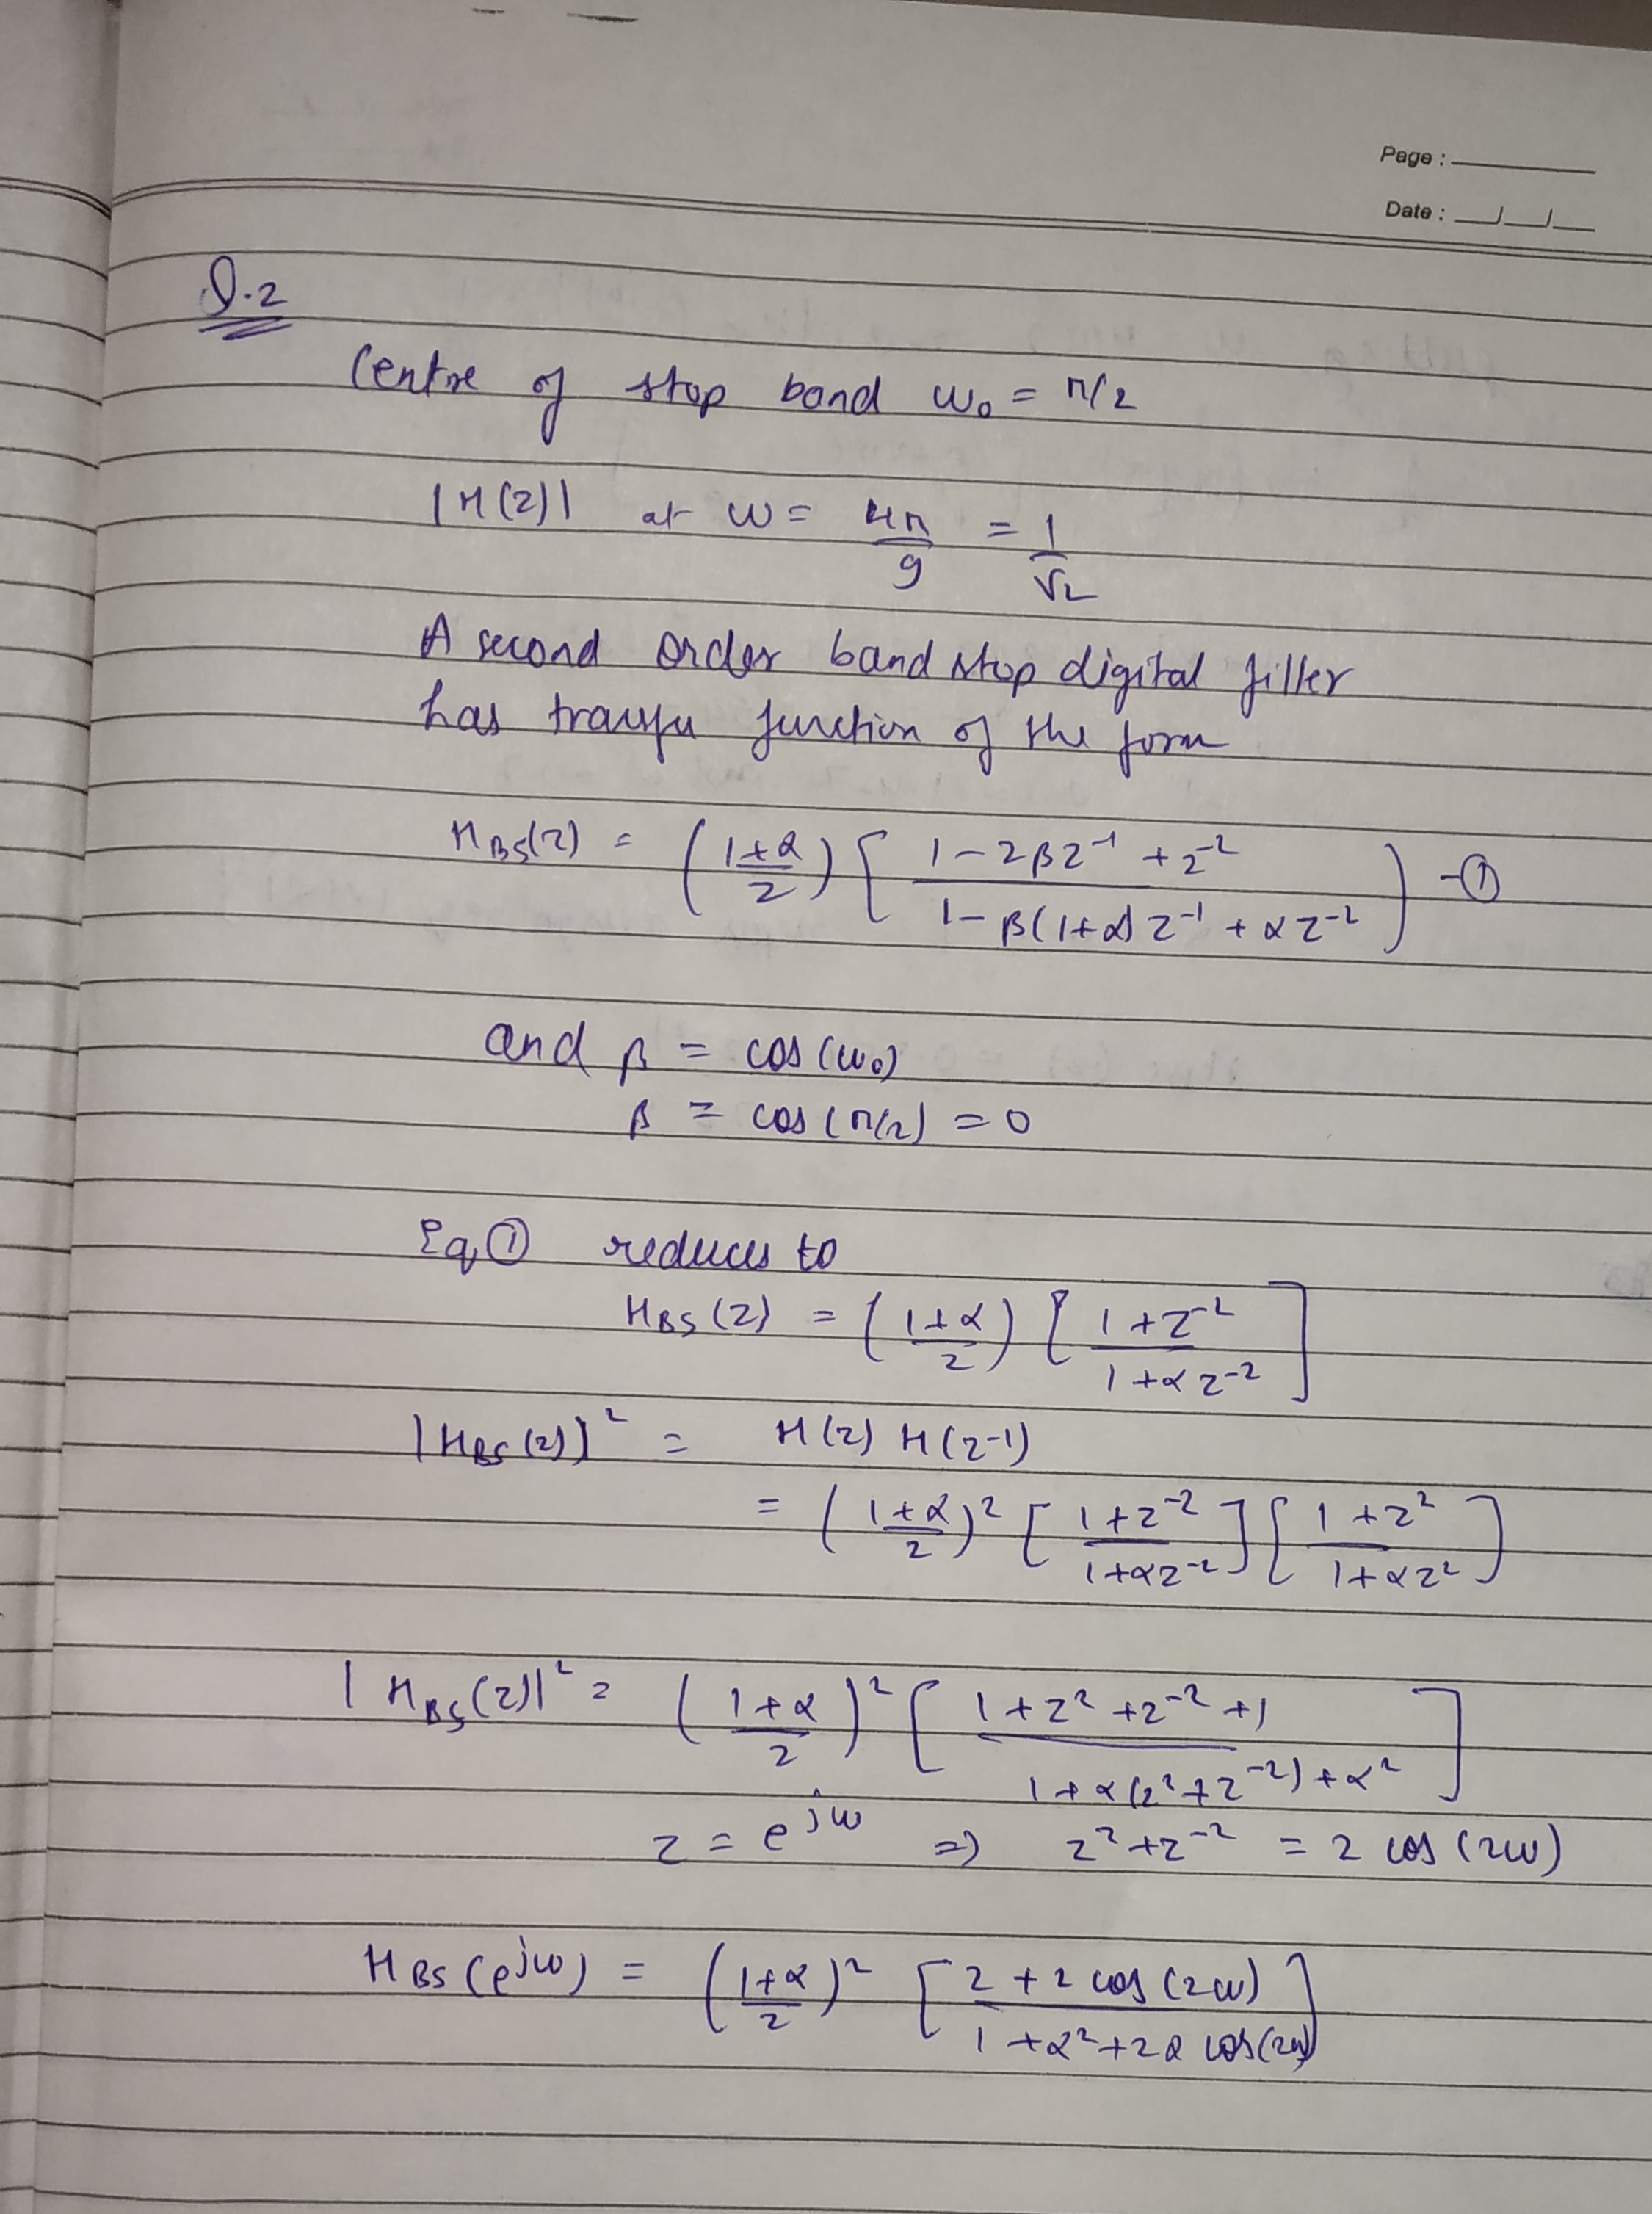

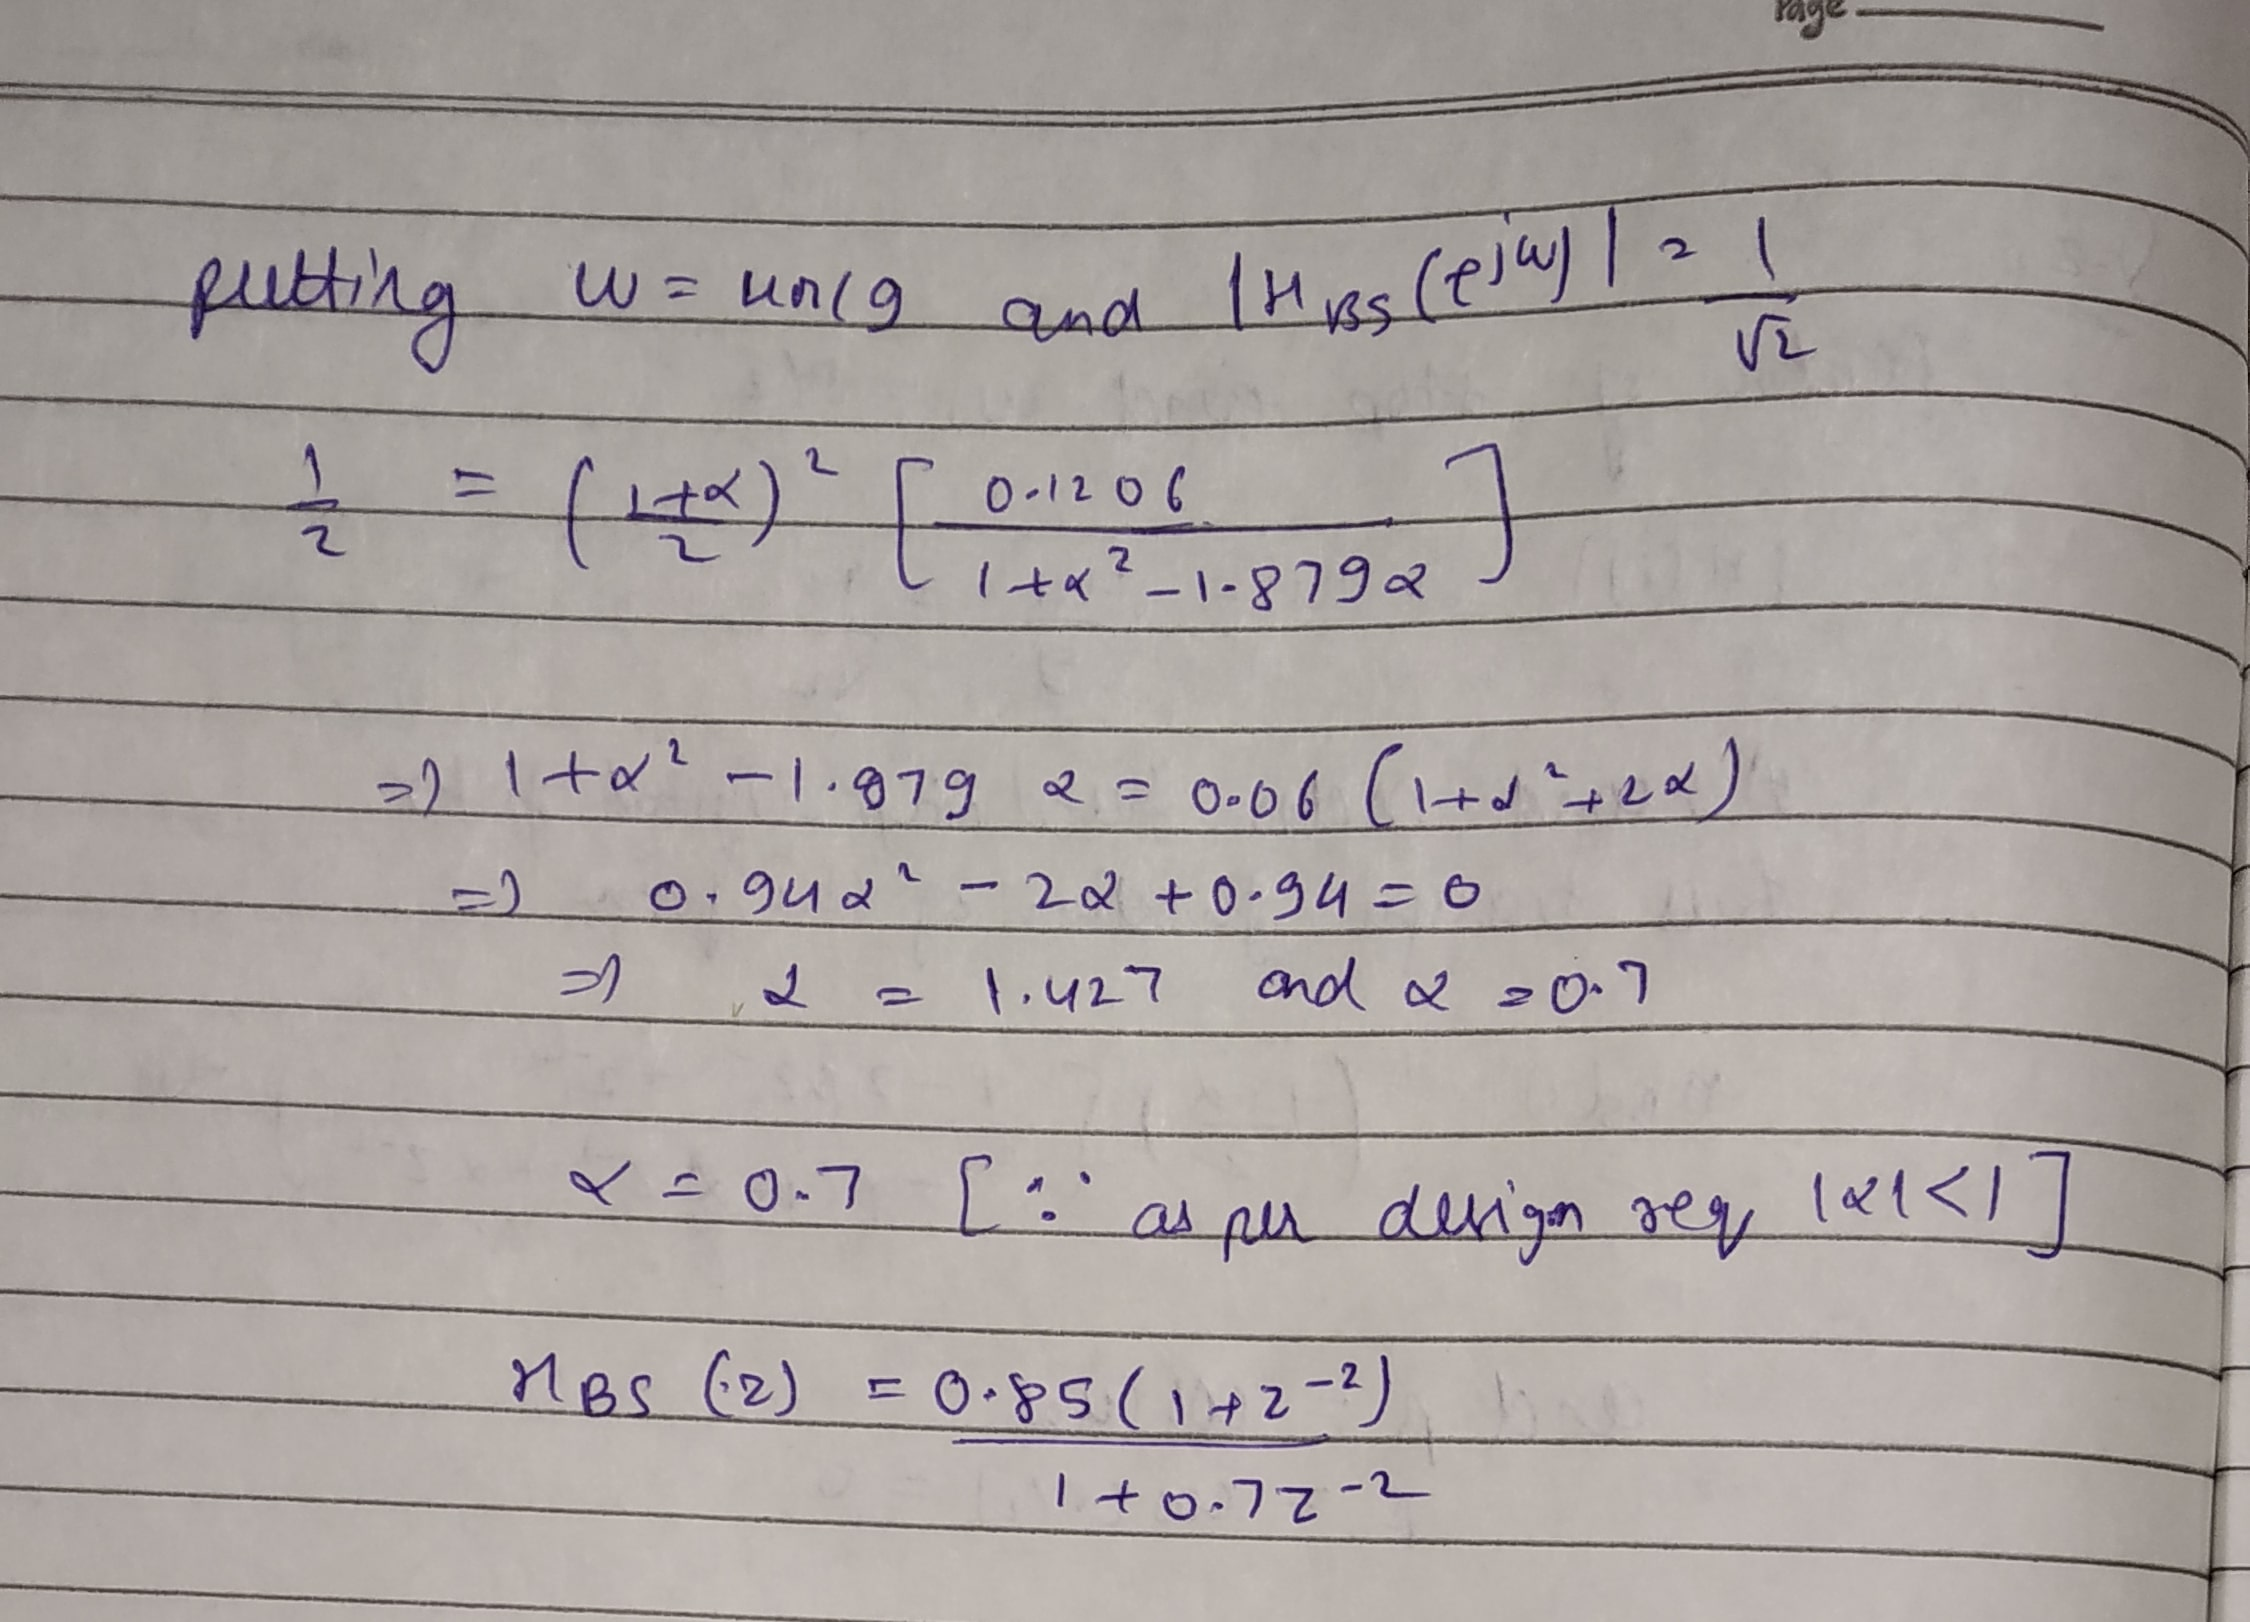

In [8]:

q2_b = np.array([1,0,1]) * 0.85 # denominator coeff
q2_a = np.array([1,0,0.7]) # numerator coeff

q2_w, q2_h = signal.freqz(q2_b, q2_a, worN = 100) # transfer function



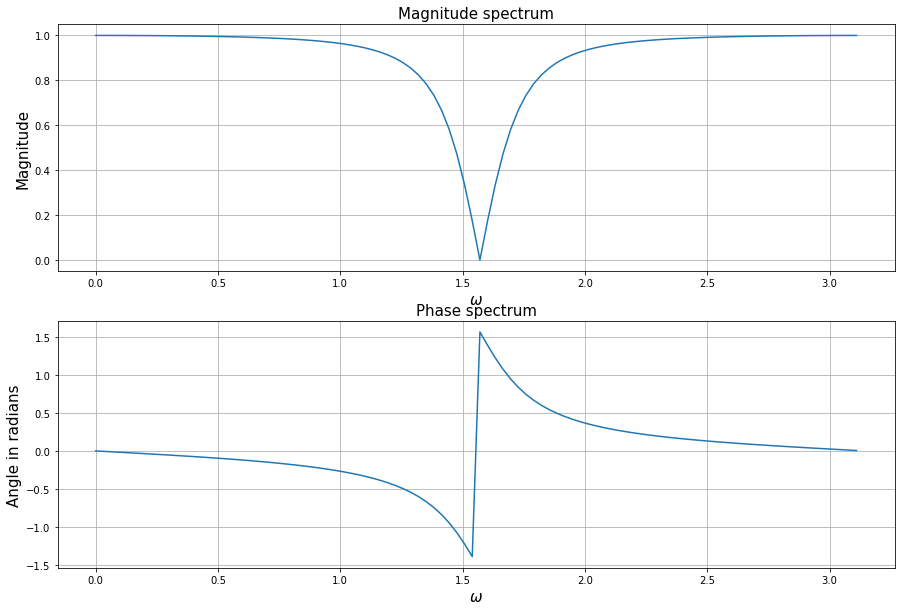

In [9]:
# plotting magnitude and phase response
q2fig1 = plt.figure(figsize = (15,10))

q2fig1.add_subplot(211)
plt.plot(q2_w,abs(q2_h))
plt.title('Magnitude spectrum',size = 15)
plt.xlabel('$\omega$',size = 15)
plt.ylabel('Magnitude',size = 15)
plt.grid()

q2fig1.add_subplot(212)
plt.plot(q2_w, np.arctan(q2_h.imag/q2_h.real))
plt.title('Phase spectrum',size = 15)
plt.xlabel('$\omega$',size = 15)
plt.ylabel('Angle in radians',size = 15)
plt.grid()
plt.show()

In [10]:
q2_op_dft = q2_h * q1_dft[:100] # multiplying DFTs

q2_idft = np.fft.ifft(q2_op_dft) # taking inverse dft

C:\Users\Asus\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


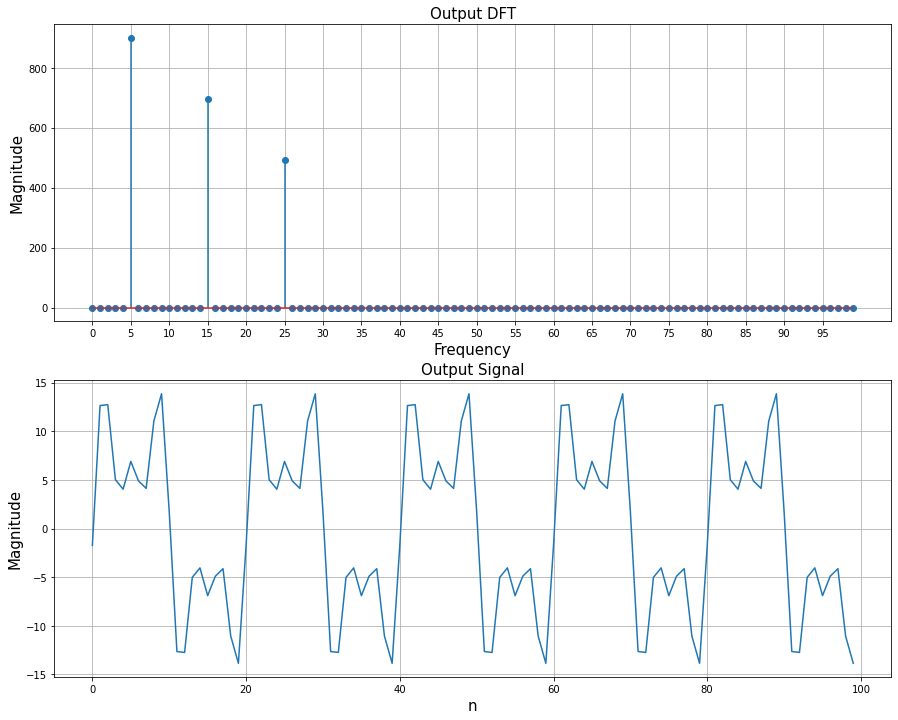

In [11]:
q2fig2 = plt.figure(figsize = (15,12))

q2fig2.add_subplot(211)
plt.stem(abs(q2_op_dft))
plt.xlabel('Frequency',size = 15)
plt.ylabel('Magnitude',size = 15)
plt.title('Output DFT',size = 15)
plt.xticks(np.arange(0,100,5))
plt.grid()

q2fig2.add_subplot(212)
plt.plot(q2_idft)
plt.xlabel('n',size = 15)
plt.ylabel('Magnitude',size = 15)
plt.title('Output Signal',size = 15)
plt.grid()

plt.show()

# Q3
#### For the digital filter shown below
$$ H(z) = \frac{-0.2+0.18z^{-1}+0.4z^{-2}+z^{-3}}{1+0.4z^{-1}+0.18z^{-2}-0.2z^{-3}} $$
#### (a) Determine the poles and zeros of H(z). What type of filter is this? Is there any relationship between the poles and zeros of H(z). If yes, explain the same.
#### (b) Plot the magnitude and phase spectra of H(z).

# a

In [12]:
# num and den coeff
q3_num = [-0.2,0.18,0.4,1]
q3_den = [1,0.4,0.18,-0.2]

# getting poles and zeros
q3_zeros = np.roots(q3_num) 
q3_poles = np.roots(q3_den)

print(f'The zeros of given Transfer Function is:\n {q3_zeros}')
print(f'\nThe poles of given Transfer Function is:\n {q3_poles}')

The zeros of given Transfer Function is:
 [ 2.5+0.j         -0.8+1.16619038j -0.8-1.16619038j]

The poles of given Transfer Function is:
 [-0.4+0.58309519j -0.4-0.58309519j  0.4+0.j        ]


######  The zeros are inverse of the given poles
###### The given filter is all pass filter.

# b

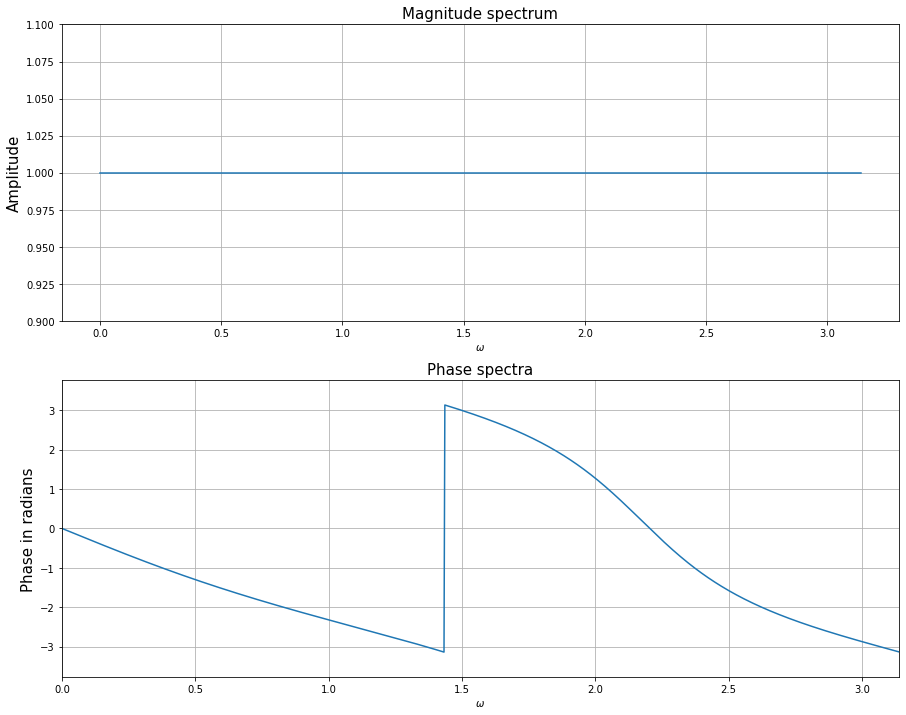

In [13]:
q3_w, q3_h = signal.freqz(b=q3_num,a=q3_den,worN=1000) # transfer function

# plotting magnitude and phase response
plt.figure(figsize=(15,12))

plt.subplot(211)
plt.plot(q3_w, abs(q3_h) )
plt.title('Magnitude spectrum',size = 15)
plt.xlabel(r'$\omega$')
plt.ylabel('Amplitude', size = 15)
plt.grid()
plt.ylim(0.9,1.1)

plt.subplot(212)
plt.plot(q3_w, np.angle(q3_h))
plt.title('Phase spectra',size = 15)
plt.xlabel(r'$\omega$')
plt.ylabel('Phase in radians', size = 15)
plt.grid(which='both', axis='both')
plt.margins(0, 0.1)

plt.show()

# Q4
#### Design a third-order digital highpass Chebyshev filter with a cutoff frequency of 2 kHz and 1 dB ripple on the passband at a sampling frequency of 8,000 Hz.
#### (a) Determine the transfer function and the difference equation.
#### (b) Plot the magnitude and phase frequency responses.
#### (c) Find the zeros and poles, and plot them.



In [14]:
# designing filter
q4_b, q4_a = signal.cheby1(N=3,rp = 1,Wn = [2000], btype = 'highpass', output = 'ba', fs = 8000)
print(f'b = {np.round(q4_b,4)}, \na = {np.round(q4_a,4)}')

b = [ 0.1321 -0.3964  0.3964 -0.1321], 
a = [1.     0.3432 0.6044 0.2041]


$$ H(z) = \frac{0.1321-0.3964z^{-1}+0.3964z^{-2}-0.1321z^{-3}}{1+0.3432z^{-1}+0.6044z^{-2}+0.2041z^{-3}} $$
# 
$$ y(n) = -0.3432y(n-1)-0.6044y(n-2)-0.2041y(n-3)+0.1321x(n)-0.3964x(n-1)+0.3964x(n-2)-0.1321x(n-3) $$

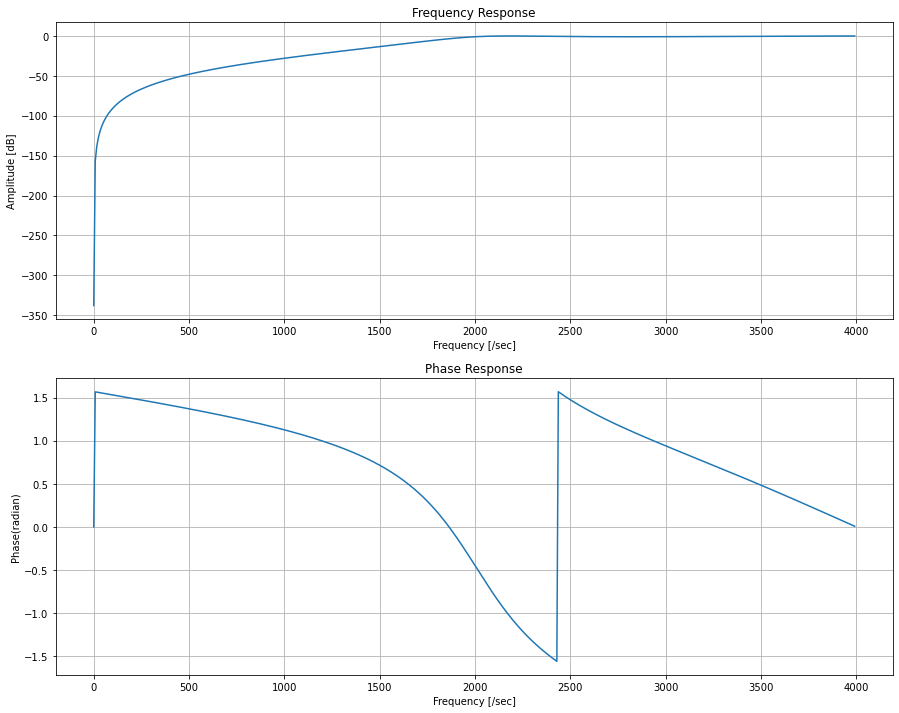

In [15]:
q4_w,q4_h = signal.freqz(q4_b,q4_a,worN=512, fs = 8000) # transfer function

# plotting magnitude and phase response
q4fig = plt.figure(figsize=(15,12))

q4fig.add_subplot(211)
plt.plot(q4_w,20*np.log10(abs(q4_h)))
plt.title('Frequency Response')
plt.xlabel('Frequency [/sec]')
plt.ylabel('Amplitude [dB]')
plt.grid()

q4fig.add_subplot(212)
plt.plot(q4_w, np.arctan(q4_h.imag/q4_h.real))
plt.title('Phase Response')
plt.xlabel('Frequency [/sec]')
plt.ylabel('Phase(radian)')
plt.grid()

plt.show()

In [16]:
q4_zeros = np.roots(q4_b)
q4_poles = np.roots(q4_a)

print(f'The zeros of given Transfer Function is:\n {q4_zeros}')
print(f'\nThe poles of given Transfer Function is:\n {q4_poles}')




The zeros of given Transfer Function is:
 [1.00000205+3.55693933e-06j 1.00000205-3.55693933e-06j
 0.99999589+0.00000000e+00j]

The poles of given Transfer Function is:
 [-0.00232899+0.77640918j -0.00232899-0.77640918j -0.33853523+0.j        ]


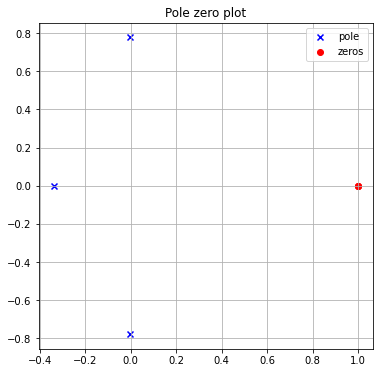

In [17]:
# Plotting the pole zero plot

plt.figure(figsize=(6,6))
plt.scatter(q4_poles.real,q4_poles.imag,marker="x",label='pole',c='b')
plt.scatter(q4_zeros.real,q4_zeros.imag,marker="o",label='zeros',c='r')
plt.title('Pole zero plot')
plt.grid()
plt.legend()
plt.show()

# Q5
#### Design a digital lowpass Butterworth filter with the following specifications:
#### (a) 3 dB attenuation at the passband frequency of 1.5 kHz
#### (b) 10 dB stopband attenuation at the frequency of 3 kHz
#### (c) Sampling frequency of 8, 000 Hz.
#### Plot the magnitude and phase responses.

$$ H(z) = \frac{0.4006+0.4006z^{-1}}{1-0.1989z^{-1}}$$

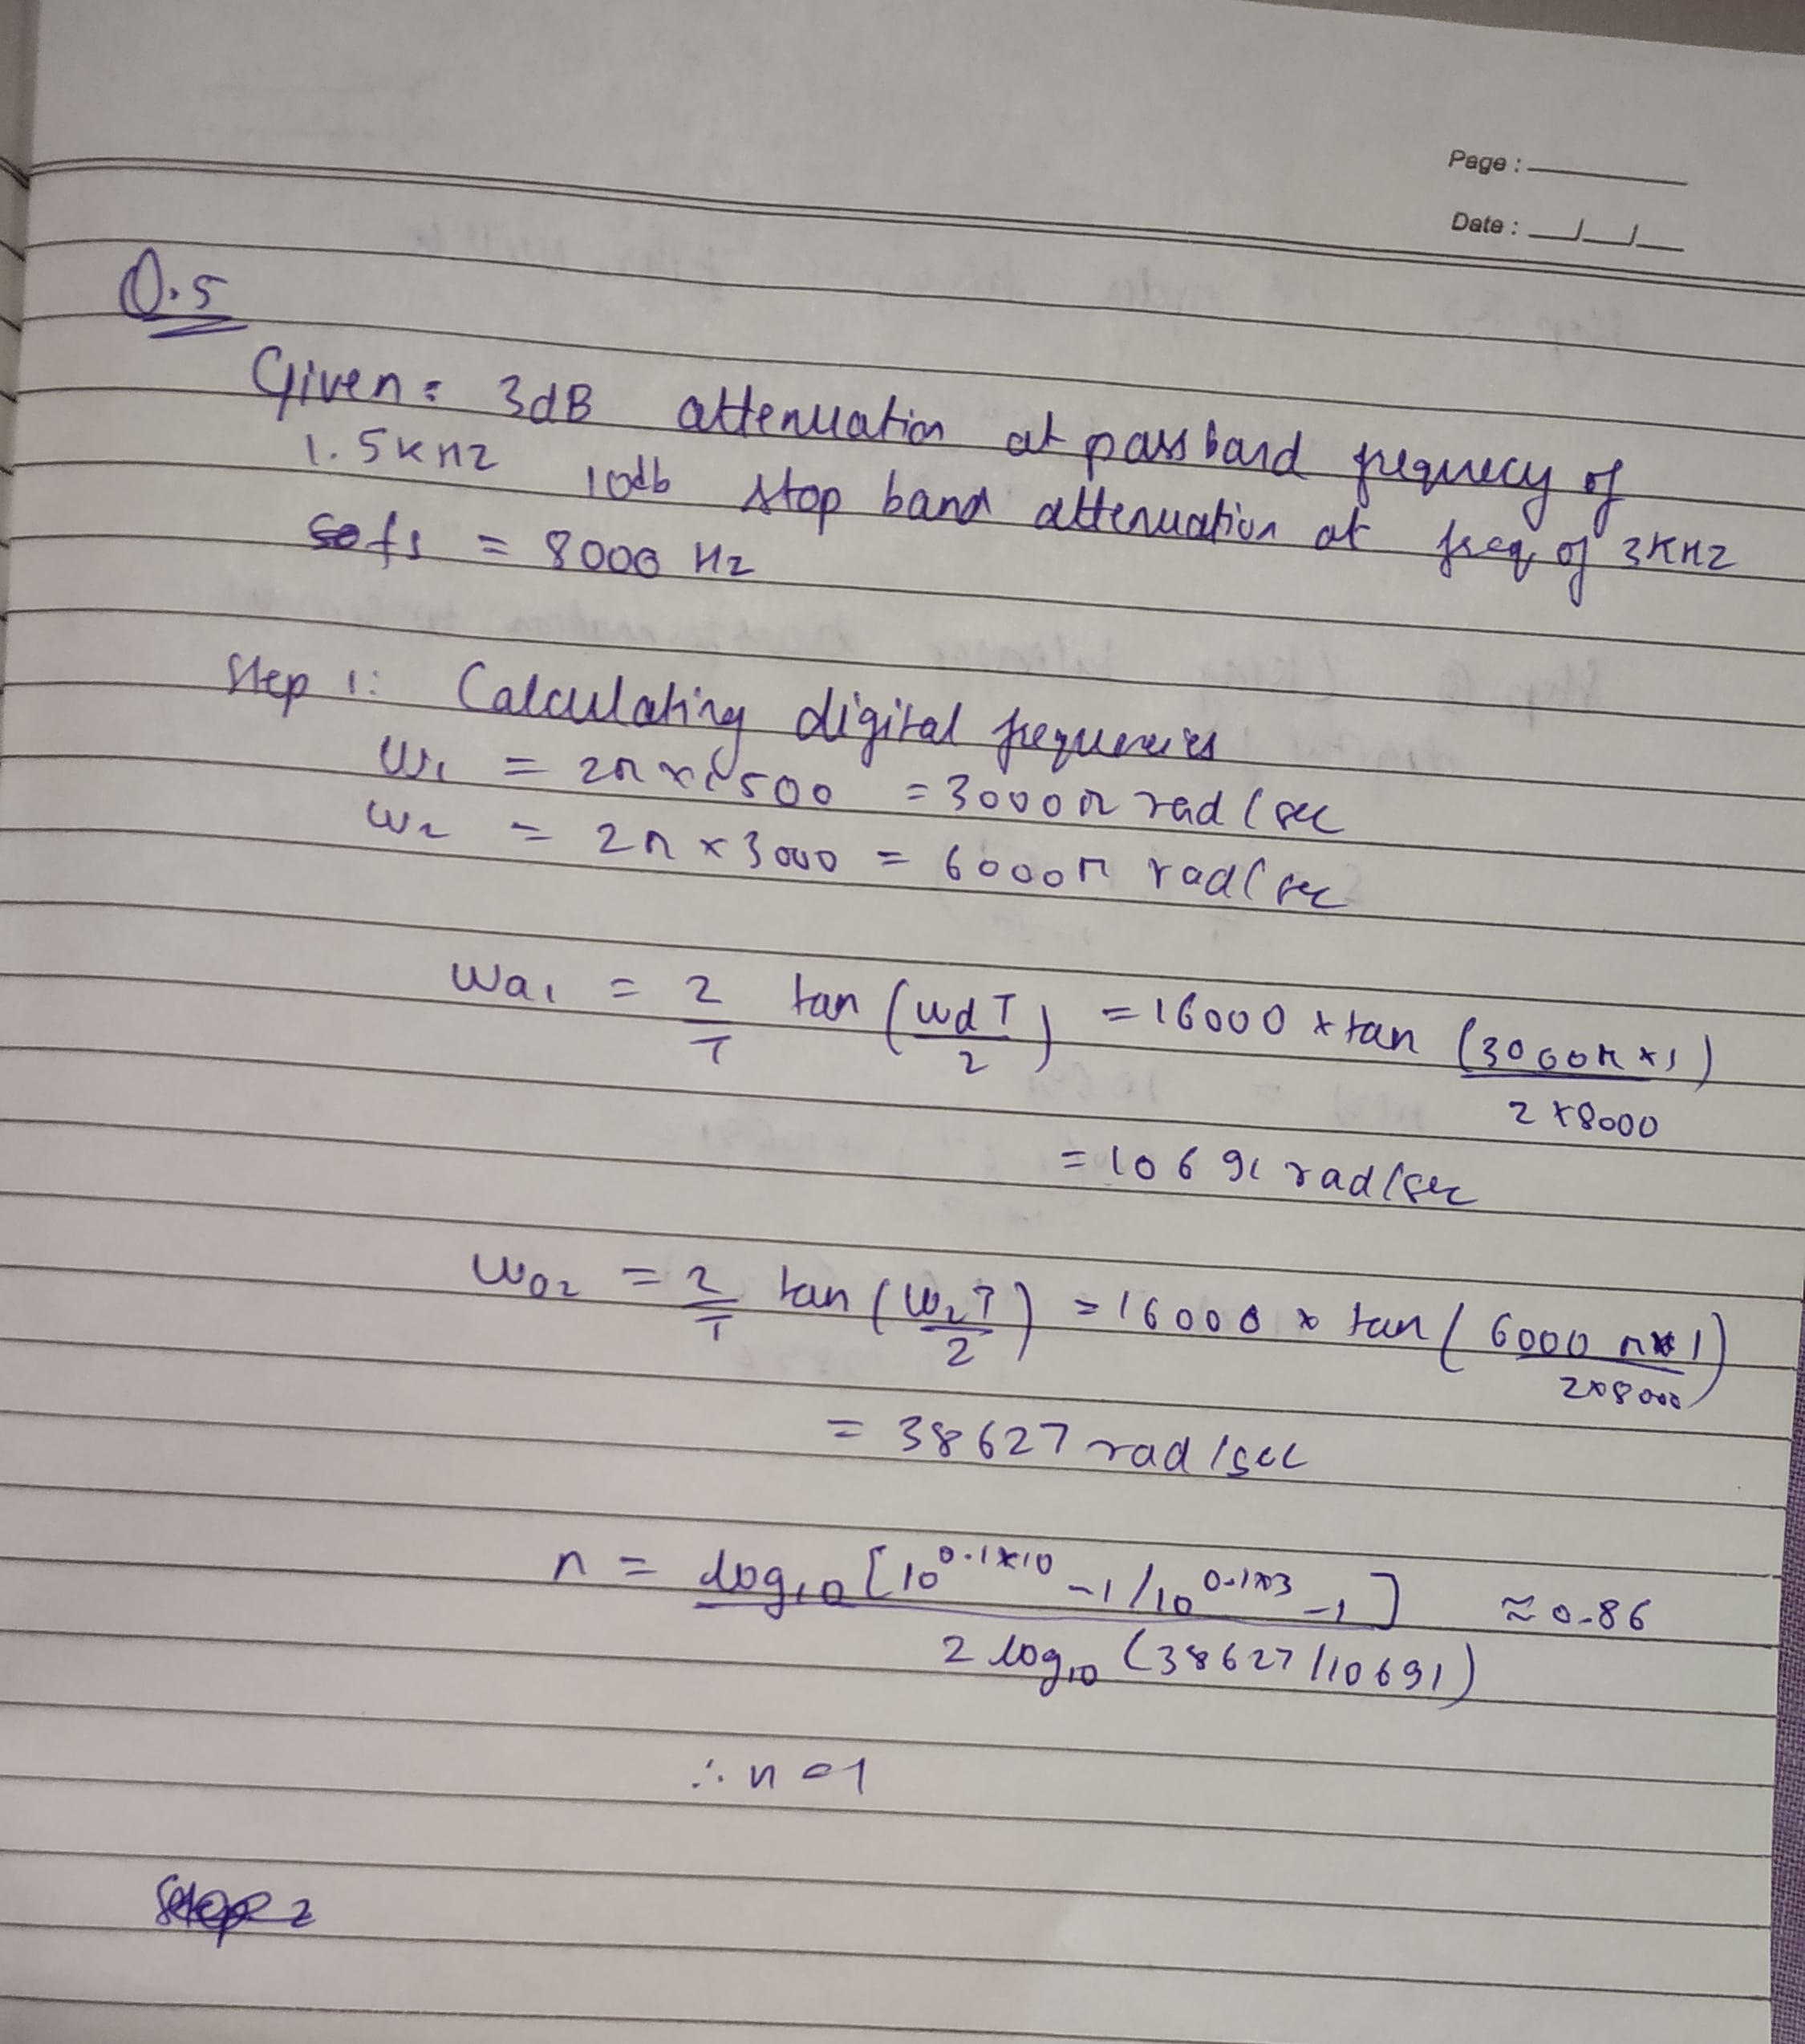

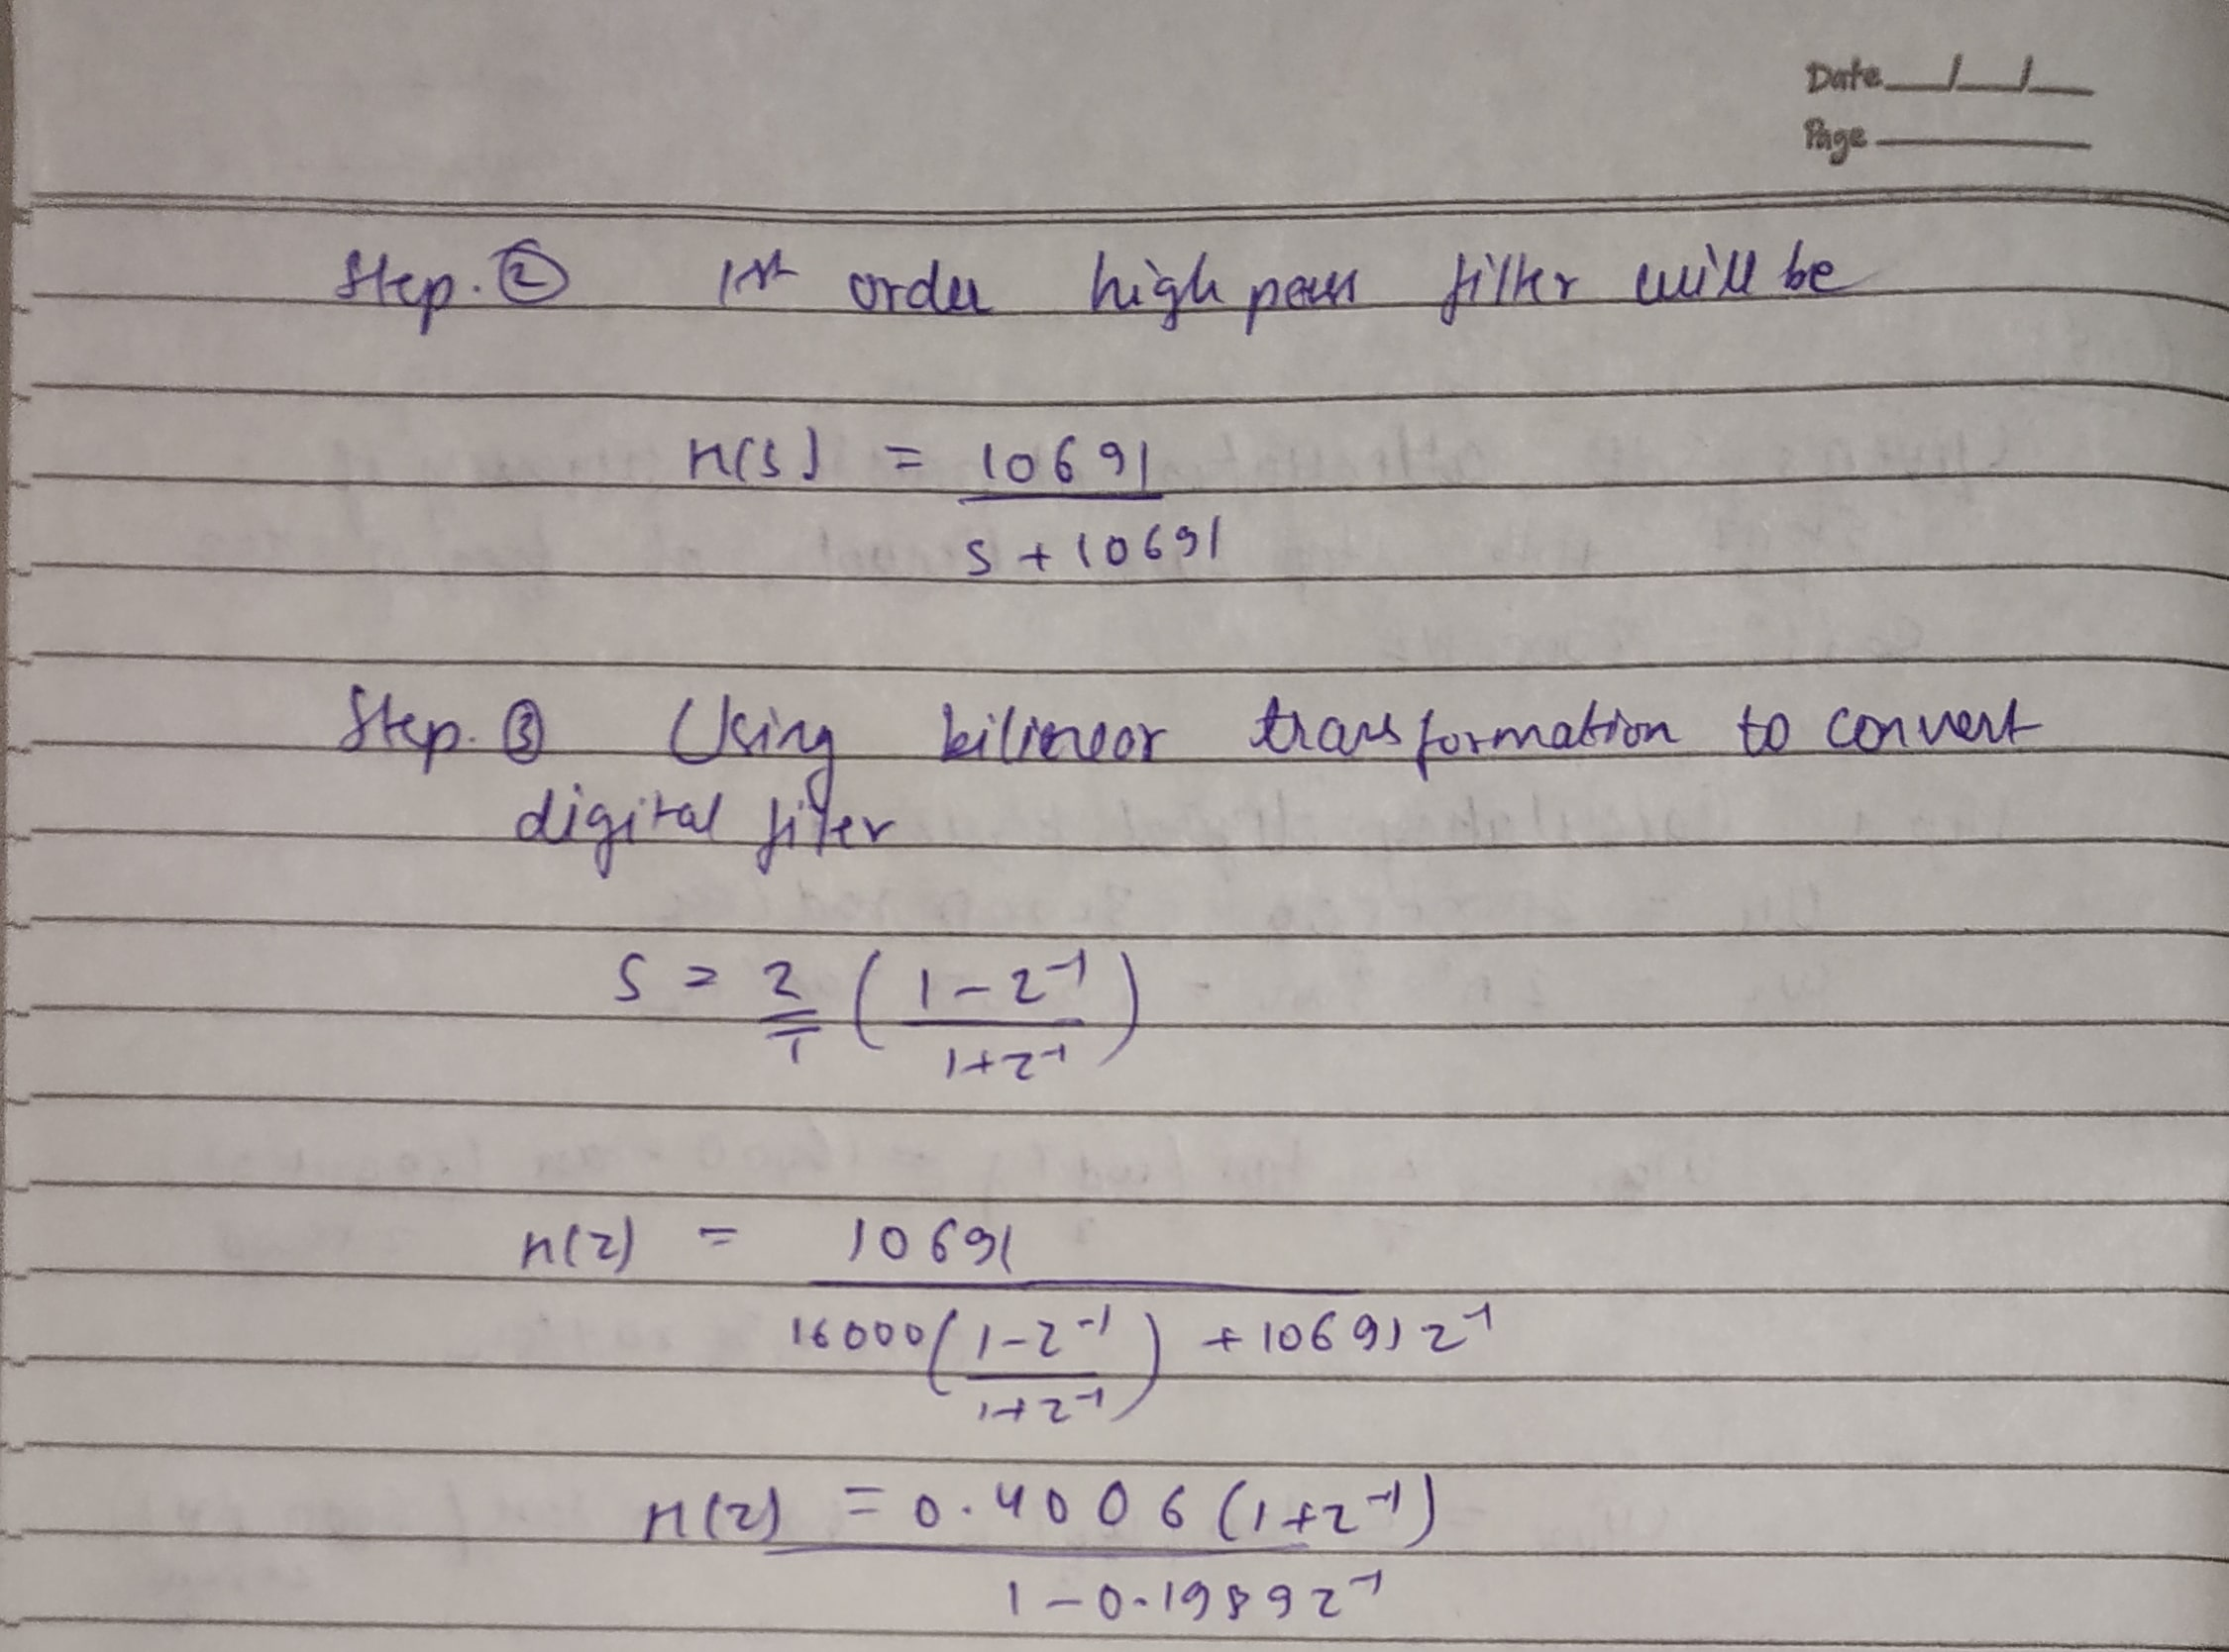

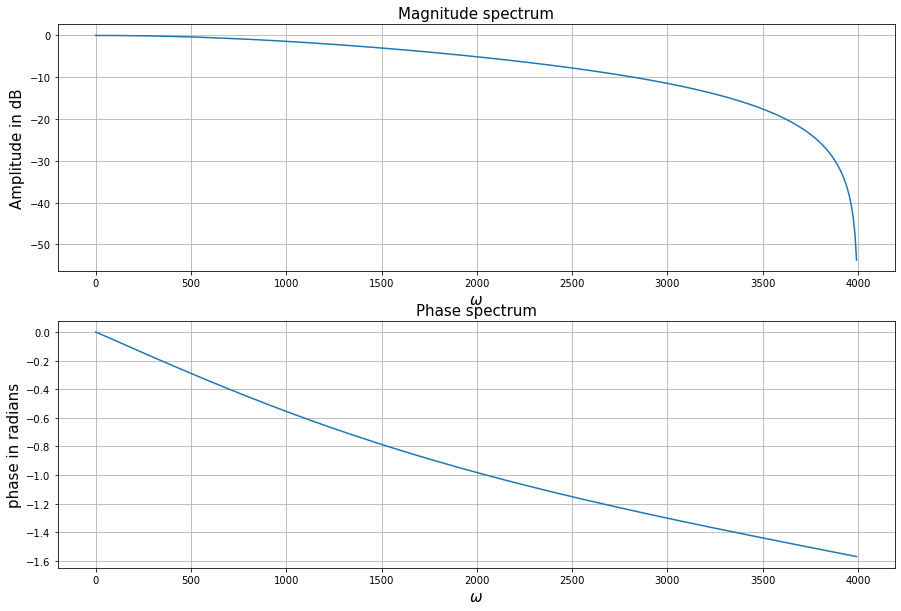

In [18]:
# num and den coeff
q5_b = [0.4006, 0.4006 ]
q5_a = [1, -0.1989]

q5_w, q5_h = signal.freqz(q5_b, q5_a, worN = 512, fs = 8000)

q5fig = plt.figure(figsize=(15,10))

q5fig.add_subplot(211)
plt.plot(q5_w,20*np.log10(abs(q5_h)))
plt.title('Magnitude spectrum',size = 15)
plt.xlabel('$\omega$',size = 15)
plt.ylabel('Amplitude in dB',size = 15)
plt.grid()

q5fig.add_subplot(212)
plt.plot(q5_w,np.arctan(q5_h.imag/q5_h.real))
plt.title('Phase spectrum',size = 15)
plt.xlabel('$\omega$',size = 15)
plt.ylabel('phase in radians',size = 15)
plt.grid()


plt.show()

# Q6
#### Fast Fourier Transform (FFT) 
#### Consider a random sequence x[n] of length N = 1024.
#### (a) Write a function to compute the DFT of the sequence. How many operations are required for computing the DFT? Don’t use any inbuilt function for this part. After implementation, compute the time taken by the code to run using the time library.
#### (b) Compute the DFT of sequence using np.fft. Compute the time taken by the code to run using the time library.
#### (c) Are the implementations in part (a) and part (b) similar? Compare the closeness and compute time for both the parts? What can be concluded?
#### (d) Vary the number of samples N from 1, 2, 4, 8, ..., 2048. For each N compare the performance in terms of time for DFT implemented in part (a) and FFT implemented in part (b). Plot a graph for the same.

# a

In [19]:
q6_ln = 1024
q6_x = np.random.random(q6_ln)

In [20]:
def dft(f): # function to calculate DFT
    N = len(f)
    W = np.zeros((N,N), dtype = complex) # zero complex array
    w = np.exp(-2j * pi / N)
    for i in range(N): # creating matrix to calculate DFT
        for j in range(N):
            W[i][j] = w**(i * j)
    op = np.matmul(W,f)
        
        # returns k axis, real part, imag part, and modulus
    return  op, abs(op) 

In [21]:
# calculating comptation time by custom function
q6_start_dft = time.time()
q6_dft = dft(q6_x)
q6_end_dft = time.time()

print(f'Time take by custom function to compute DFT is {q6_end_dft - q6_start_dft} seconds')

Time take by custom function to compute DFT is 0.6986448764801025 seconds


# b

In [22]:
# calculating comptation time by inbuilt function
q6_start_fft = time.time()
q6_fft = np.fft.fft(q6_x)
q6_end_fft = time.time()

print(f'Time take by inbuilt function to compute DFT is {q6_end_fft - q6_start_fft} seconds')

Time take by inbuilt function to compute DFT is 0.0009987354278564453 seconds


# d

In [23]:

q6_N = np.power(2,range(0,12))

q6_dft_array = np.zeros(12)
q6_fft_array = np.zeros(12)

for i in range(12):
    q6_seq = np.random.random(q6_N[i])
    
    dft_strt = time.time()
    q6dft = dft(q6_seq)
    dft_end = time.time()
    
    
    fft_strt = time.time()
    q6fft = np.fft.fft(q6_seq)
    fft_end = time.time()
    
    q6_dft_array[i] = dft_end - dft_strt
    q6_fft_array[i] = fft_end - fft_strt
    
    


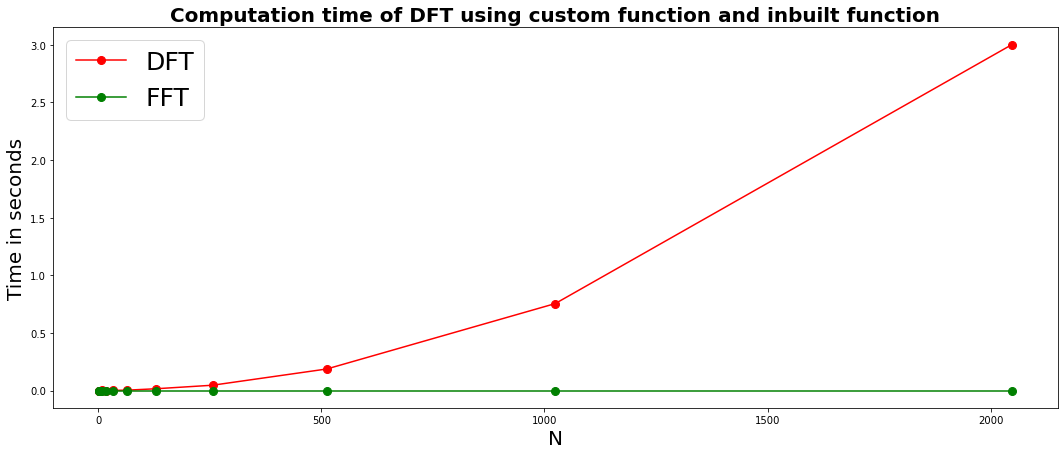

In [24]:
q6fig = plt.figure(figsize = (18,7))
q6fig.add_subplot(111)

plt.plot(q6_N, q6_dft_array, 'r', marker = 'o',markersize = 8,label='DFT')
plt.plot(q6_N, q6_fft_array, 'g', marker = 'o',markersize = 8,label='FFT')
plt.title('Computation time of DFT using custom function and inbuilt function',size = 20,weight = 'bold')
plt.xlabel('N',size = 20)
plt.ylabel('Time in seconds',size = 20)
plt.legend(prop = {'size':25})
plt.show()

# Q7
#### Consider a sequence x[n] = {1, 1, 1, 1, 0, 0, 0, 0}, compute the DFT of the following sequence using 8-point radix-2 DIT-FFT algorithm. Plot the sequence and the resulting DFT. Also compute the time taken to run the code.

In [25]:
q7_x = [1,1,1,1,0,0,0,0]
q7_len = len(q7_x)

q7_DIT_strt = time.time()

q7_x1 = np.zeros(q7_len,dtype=np.complex64)
q7_x2 = np.zeros(q7_len,dtype=np.complex64)
q7_x3 = np.zeros(q7_len,dtype=np.complex64)

q7_w = np.exp(-2j*np.pi/len(q7_x))

# Splitting the given data as {(0,4),(2,6),(1,5),(3,7)} and computing 2 point DFT of each pair

# 2 point DFT between index 0 and 4
q7_x1[0] = q7_x[0] + q7_x[4]
q7_x1[1] = q7_x[0] - q7_x[4]

# 2 point DFT between index 2 and 6
q7_x1[2] = q7_x[2] + q7_x[6]
q7_x1[3] = q7_x[2] - q7_x[6]

# 2 point DFT between index 1 and 5
q7_x1[4] = q7_x[1] + q7_x[5]
q7_x1[5] = q7_x[1] - q7_x[5]

# 2 point DFT between index 3 and 7
q7_x1[6] = q7_x[3] + q7_x[7]
q7_x1[7] = q7_x[3] - q7_x[7]


# Combining 2 point DFT of even and odd sequences

# Even Sequences
q7_x2[0] = q7_x1[0] + (q7_w**0)*q7_x1[2]
q7_x2[1] = q7_x1[1] + (q7_w**2)*q7_x1[3]
q7_x2[2] = q7_x1[0] - (q7_w**0)*q7_x1[2]
q7_x2[3] = q7_x1[1] - (q7_w**2)*q7_x1[3]

# Odd sequence
q7_x2[4] = q7_x1[4] + (q7_w**0)*q7_x1[6]
q7_x2[5] = q7_x1[5] + (q7_w**2)*q7_x1[7]
q7_x2[6] = q7_x1[4] - (q7_w**0)*q7_x1[6]
q7_x2[7] = q7_x1[5] - (q7_w**2)*q7_x1[7]


# Combining 4 point DFTs 

q7_x3[0] = q7_x2[0] + (q7_w**0)*q7_x2[4]
q7_x3[1] = q7_x2[1] + (q7_w**1)*q7_x2[5]
q7_x3[2] = q7_x2[2] + (q7_w**2)*q7_x2[6]
q7_x3[3] = q7_x2[3] + (q7_w**3)*q7_x2[7]
q7_x3[4] = q7_x2[0] - (q7_w**0)*q7_x2[4]
q7_x3[5] = q7_x2[1] - (q7_w**1)*q7_x2[5]
q7_x3[6] = q7_x2[2] - (q7_w**2)*q7_x2[6]
q7_x3[7] = q7_x2[3] - (q7_w**3)*q7_x2[7]

q7_DIT_end = time.time()


print('The FFT of the given signal using DIT is:\n')
for i in range(q7_len):
    print(f"X[{i}] = {q7_x3[i]}")
    
print(f'\nThe time taken to calculate DIT is:{q7_DIT_end-q7_DIT_strt}')

The FFT of the given signal using DIT is:

X[0] = (4+0j)
X[1] = (1-2.4142136573791504j)
X[2] = 0j
X[3] = (1-0.4142135679721832j)
X[4] = 0j
X[5] = (1+0.4142135679721832j)
X[6] = 0j
X[7] = (1+2.4142136573791504j)

The time taken to calculate DIT is:0.0019719600677490234


<ipython-input-26-19897d48e861>:31: RuntimeWarning: invalid value encountered in true_divide
  plt.stem(q7_N, np.arctan(q7_x3.imag/q7_x3.real))


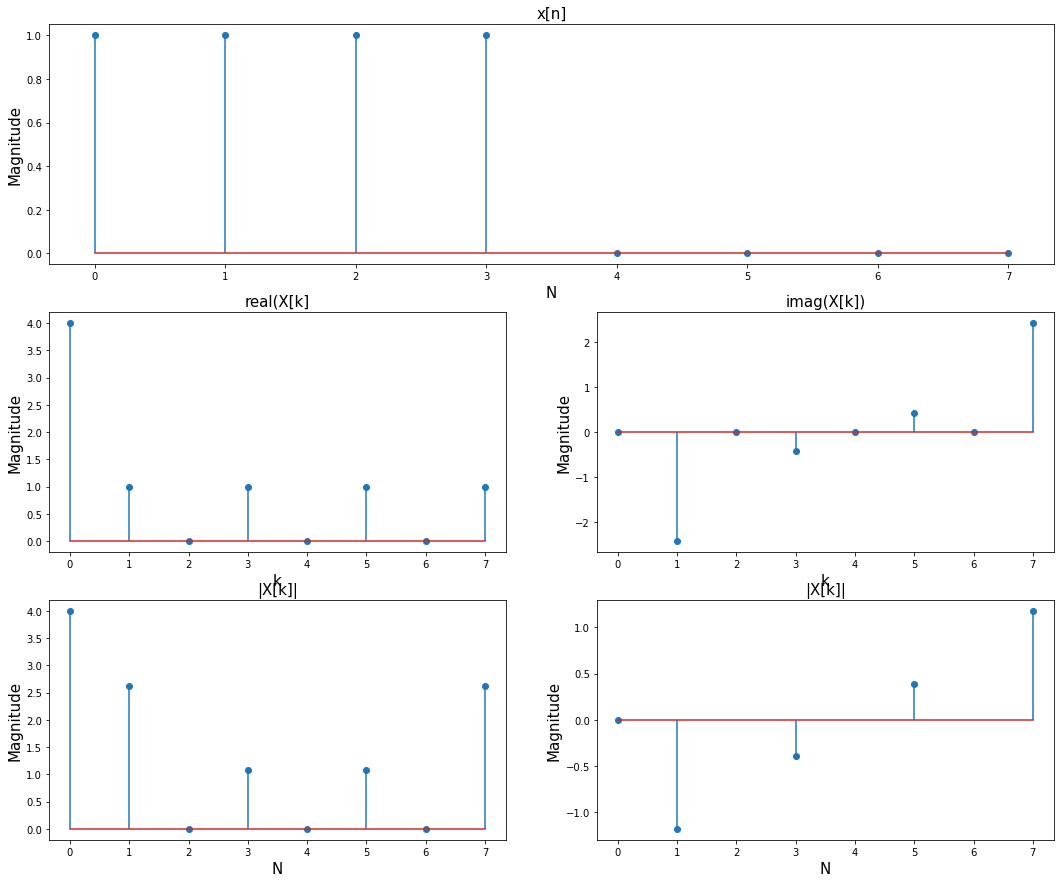

In [26]:
# plotting
q7_N = np.arange(q7_len)

q7fig  = plt.figure(figsize = (18,15))

q7fig.add_subplot(311)
plt.stem(q7_N, q7_x)
plt.title('x[n]', size = 15)
plt.xlabel('N',size = 15)
plt.ylabel('Magnitude',size = 15)

q7fig.add_subplot(323)
plt.stem(q7_N, q7_x3.real)
plt.title('real(X[k]', size = 15)
plt.xlabel('k',size = 15)
plt.ylabel('Magnitude',size = 15)

q7fig.add_subplot(324)
plt.stem(q7_N, q7_x3.imag)
plt.title('imag(X[k])', size = 15)
plt.xlabel('k',size = 15)
plt.ylabel('Magnitude',size = 15)

q7fig.add_subplot(325)
plt.stem(q7_N, abs(q7_x3))
plt.title('|X[k]|', size = 15)
plt.xlabel('N',size = 15)
plt.ylabel('Magnitude',size = 15)

q7fig.add_subplot(326)
plt.stem(q7_N, np.arctan(q7_x3.imag/q7_x3.real))
plt.title('|X[k]|', size = 15)
plt.xlabel('N',size = 15)
plt.ylabel('Magnitude',size = 15)
plt.show()

# Q8
#### Decimation in Frequency (DIF)
#### For the sequence in the previous question, compute the DFT using 8- point radix-2 DIF-FFT algorithm. Plot the sequence and the resulting DFT. Compare the time taken to run the code with previous case.

In [27]:
q8_x = [1,1,1,1,0,0,0,0]
q8_len = len(q8_x)
q8_DIF_strt = time.time()

q8_x1 = np.zeros(len(q8_x),dtype=np.complex64)
q8_x2 = np.zeros(len(q8_x),dtype=np.complex64)
q8_x3 = np.zeros(len(q8_x),dtype=np.complex64)

q8_w = np.exp(-1j*2*np.pi/len(q8_x))



q8_x1[0] = q8_x[0] + q8_x[4]
q8_x1[1] = q8_x[1] + q8_x[5]
q8_x1[2] = q8_x[2] + q8_x[6]
q8_x1[3] = q8_x[3] + q8_x[7]
q8_x1[4] = (q8_x[0] - q8_x[4])*(q8_w**0)
q8_x1[5] = (q8_x[1] - q8_x[5])*(q8_w**1)
q8_x1[6] = (q8_x[2] - q8_x[6])*(q8_w**2)
q8_x1[7] = (q8_x[3] - q8_x[7])*(q8_w**3)

###################################################################

# Combining 2 point DFT of even and odd sequences

# Even Sequences
q8_x2[0] = q8_x1[0] + q8_x1[2]
q8_x2[1] = q8_x1[1] + q8_x1[3]
q8_x2[2] = (q8_x1[0] - q8_x1[2])*(q8_w**0)
q8_x2[3] = (q8_x1[1] - q8_x1[3])*(q8_w**2)

# Odd sequence
q8_x2[4] = q8_x1[4] + q8_x1[6]
q8_x2[5] = q8_x1[5] + q8_x1[7]
q8_x2[6] = (q8_x1[4] - q8_x1[6])*(q8_w**0)
q8_x2[7] = (q8_x1[5] - q8_x1[7])*(q8_w**2)

##################################################################

# 2 point DFT between index 0 and 4
q8_x3[0] = q8_x2[0] + q8_x2[1]
q8_x3[1] = q8_x2[0] - q8_x2[1]

# 2 point DFT between index 2 and 6
q8_x3[2] = q8_x2[2] + q8_x2[3]
q8_x3[3] = q8_x2[2] - q8_x2[3]

# 2 point DFT between index 1 and 5
q8_x3[4] = q8_x2[4] + q8_x2[5]
q8_x3[5] = q8_x2[4] - q8_x2[5]

# 2 point DFT between index 3 and 7
q8_x3[6] = q8_x2[6] + q8_x2[7]
q8_x3[7] = q8_x2[6] - q8_x2[7]

q8_DIF_end = time.time()

print('The FFT of the given signal using DIT is:\n')
for i in range(q8_len):
    print(f"X[{i}] = {q8_x3[i]}")
    
print(f'\nThe time taken to calculate DIT is:{q8_DIF_end-q8_DIF_strt}')

The FFT of the given signal using DIT is:

X[0] = (4+0j)
X[1] = 0j
X[2] = 0j
X[3] = 0j
X[4] = (1-2.4142136573791504j)
X[5] = (1+0.41421353816986084j)
X[6] = (1-0.41421353816986084j)
X[7] = (1+2.4142136573791504j)

The time taken to calculate DIT is:0.0009875297546386719


<ipython-input-28-d946cddde6d9>:31: RuntimeWarning: invalid value encountered in true_divide
  plt.stem(q8_N, np.arctan(q8_x3.imag/q8_x3.real))


Text(0, 0.5, 'Magnitude')

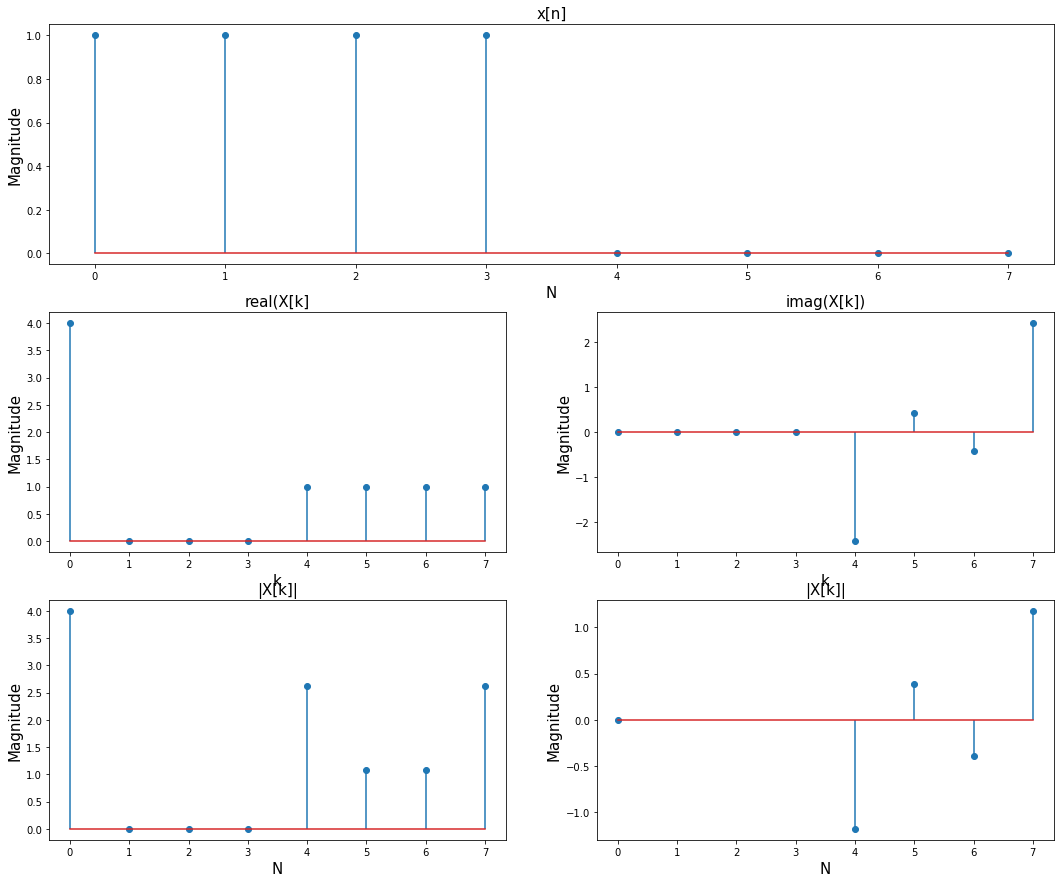

In [28]:
# plotting
q8_N = np.arange(q8_len)

q8fig  = plt.figure(figsize = (18,15))

q8fig.add_subplot(311)
plt.stem(q8_N, q8_x)
plt.title('x[n]', size = 15)
plt.xlabel('N',size = 15)
plt.ylabel('Magnitude',size = 15)

q8fig.add_subplot(323)
plt.stem(q8_N, q8_x3.real)
plt.title('real(X[k]', size = 15)
plt.xlabel('k',size = 15)
plt.ylabel('Magnitude',size = 15)

q8fig.add_subplot(324)
plt.stem(q8_N, q8_x3.imag)
plt.title('imag(X[k])', size = 15)
plt.xlabel('k',size = 15)
plt.ylabel('Magnitude',size = 15)

q8fig.add_subplot(325)
plt.stem(q8_N, abs(q8_x3))
plt.title('|X[k]|', size = 15)
plt.xlabel('N',size = 15)
plt.ylabel('Magnitude',size = 15)

q8fig.add_subplot(326)
plt.stem(q8_N, np.arctan(q8_x3.imag/q8_x3.real))
plt.title('|X[k]|', size = 15)
plt.xlabel('N',size = 15)
plt.ylabel('Magnitude',size = 15)

# Q9
#### Consider a system with input x[n] = {1, 2, 3, 1} and h[n] = {1, 1, 1}, compute the output sequence y[n] using
#### (a) Linear convolution
#### (b) Circular convolution
#### Write Python functions to implement both operations from the first principle. How can you implement circular convolution through the properties of FFT

In [29]:
q9_x = [1,2,3,1]
q9_h = [1,1,1]

# a

In [30]:
def lin_convol(xn,hn): # defing the function for convolution
    total_size = len(xn) + len(hn) - 1    # total size of array after convolution
    
    newh = np.pad(hn, (0,total_size - len(hn)) )  # padding zeroes in h[n] to make its size equl to total size
    
    sum = np.zeros(total_size) # defining initial sum as zero array
    
    for i in range(len(xn)): 
        sum = sum + xn[i] * newh # multiplying each value in x[n] by new h[n] and adding to sum
        newh = np.roll(newh,1) # circular shifting new h[n] by 1
    return sum

# b

In [31]:
def cir_convol(xn,hn):
    
    N = len(xn) + len(hn) - 1
#     N = max(len(xn),len(hn))
    x = np.pad(xn, (0, N - len(xn)), 'constant', constant_values=(0,0))
    h = np.pad(hn, (0, N - len(hn)), 'constant', constant_values=(0,0))

    op = np.zeros(N)
    
    for n in range(N):
        temp = 0
        for m in range(N):
            temp = temp + x[m] * h[(n-m)%N]
        op[n] = temp
        
    return op
            
    

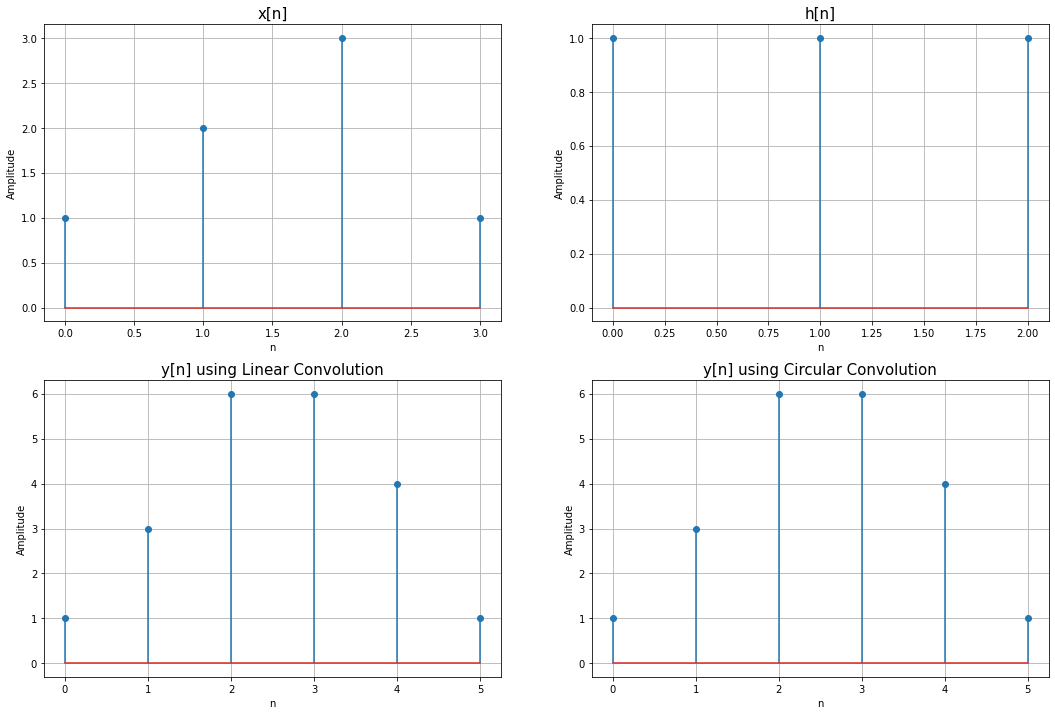

In [32]:
q9_lin = lin_convol(q9_x,q9_h) # linear conv using custom function
q9_cir = cir_convol(q9_x,q9_h) # circular conv using custom function

# plotting
q9fig1 = plt.figure(figsize = (18,12))

q9fig1.add_subplot(221)
plt.stem(q9_x)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('x[n]',size = 15)
plt.grid()

q9fig1.add_subplot(222)
plt.stem(q9_h)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('h[n]',size = 15)
plt.grid()

q9fig1.add_subplot(223)
plt.stem(q9_lin)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('y[n] using Linear Convolution',size = 15)
plt.grid()

q9fig1.add_subplot(224)
plt.stem(q9_cir)
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('y[n] using Circular Convolution',size = 15)
plt.grid()

plt.show()


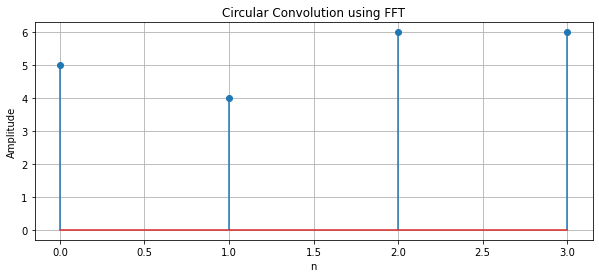

In [33]:
# circular conv using FFT properties
q9_max = max(len(q9_x), len(q9_h))
# q9_max = len(q9_x) + len(q9_h) - 1

x_pad = np.pad(q9_x, (0, q9_max - len(q9_x)), 'constant', constant_values=(0,0))
h_pad = np.pad(q9_h, (0, q9_max - len(q9_h)), 'constant', constant_values=(0,0))

x_pad_fft = np.fft.fft(x_pad)
f_pad_fft = np.fft.fft(h_pad)

y_fft = x_pad_fft * f_pad_fft

q9_y = np.fft.ifft(y_fft)

plt.figure(figsize=(10,4))

plt.stem(abs(q9_y))
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Circular Convolution using FFT')
plt.grid()